<a href="https://colab.research.google.com/github/mrzResearchArena/TF-2.X/blob/master/ACP-500-164.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Initialize TF-2.x:
try:
    %tensorflow_version 2.x  # Colab only.
except Exception:
    pass

import tensorflow as tf
print('We\'re using TF-{}.'.format(tf.__version__))

# Colab Auto Click: https://paste.ubuntu.com/p/R78fGBJbjb/

`%tensorflow_version` only switches the major version: `1.x` or `2.x`.
You set: `2.x  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.
We're using TF-2.1.0.


In [0]:
# Deep Neural Networks:
from tensorflow.keras.layers import (Input, Dense, Dropout, Flatten, BatchNormalization,
                                     Conv1D, Conv2D, MaxPooling1D, MaxPooling2D,
                                     SimpleRNN, LSTM, GRU, Bidirectional, Embedding)
from tensorflow.keras.regularizers import (l1, l2, l1_l2)
from tensorflow.keras.optimizers import (RMSprop, Adam, SGD)
from tensorflow.keras.models import (Sequential, Model)

# Core:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Performance:
from sklearn.metrics import (confusion_matrix, classification_report, mean_squared_error)

#Utilities
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical as labelEncoding # Usages: Ytrain = labelEncoding(Ytrain, dtype=int)
from tensorflow.keras.utils import plot_model                      # Usages: plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=False, expand_nested=True)
from sklearn.model_selection import (StratifiedKFold, KFold, train_test_split)
#end-import

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!ls

ACP164.npy  acp240.npy	ACP500.npy  acp740.npy	model.png


In [0]:
cd "drive/My Drive/ACP"

[Errno 2] No such file or directory: 'drive/My Drive/ACP'
/content/drive/My Drive/ACP


In [0]:
!ls

ACP164.npy  acp240.npy	ACP500.npy  acp740.npy	model.png


In [0]:
Xtrain = np.load('acp740.npy')
Xtest  = np.load('acp240.npy')

# ACP {500, 164}
# Ytrain  = [0 for _ in range(250)]
# Ytrain += [1 for _ in range(250)]
# Ytrain  = np.array(Ytrain)

# Ytest  = [0 for _ in range(82)]
# Ytest += [1 for _ in range(82)]

Ytrain  = [1 for _ in range(376)]
Ytrain += [0 for _ in range(364)]
Ytrain  = np.array(Ytrain)

Ytest  = [1 for _ in range(129)]
Ytest += [0 for _ in range(111)]


Ytest  = np.array(Ytest)

In [0]:
print(Xtrain.shape)
print(Xtest.shape)

(740, 220)
(240, 220)


In [0]:
from sklearn.utils import shuffle
Xtrain, Ytrain = shuffle(Xtrain, Ytrain)

In [0]:
Ytrain = labelEncoding(Ytrain, dtype=int)
Ytest  = labelEncoding(Ytest, dtype=int)

In [0]:
# Ytrain.shape
Ytest.shape

(240, 2)

In [0]:
# Xtrain = np.reshape(Xtrain, (len(Xtrain), 11, 20))
# # Xtrain.shape
# # help(np.reshape)

# # Xtrain.reshape(1,220)
# Xtrain.shape

In [0]:
T = 220
D = 1

Xtrain = Xtrain.reshape(740, T, D)
Xtest  = Xtest.reshape(240,  T, D)

In [0]:
# N, D = Xtrain.shape
# print(N, D)

# model = Sequential([
#     Input(shape=(D)),
#     #Dense(units=64, activation='relu'),
#     #Dropout(0.4),
#     Dense(units=64, activation='softmax'),
#     Dropout(0.2),
#     Dense(units=2, activation='softmax'),                             
# ])

# model = Sequential([
#     LSTM(units=128, return_sequences=False, input_shape=(1, D)),
#     Dropout(0.50),
#     Dense(units=2, activation='softmax'),                             
# ])


# Inspired from VGG-16:
# def Network():
#     i = Input(shape=(220,1))
#     x = Conv1D(filters=128, kernel_size=3, padding='same', activation='relu')(i)
#     x = BatchNormalization()(x)
#     print(x.shape)
#     x = Conv1D(filters=128, kernel_size=3, padding='same', activation='relu')(x)
#     x = BatchNormalization()(x)
#     print(x.shape)

#     x = Conv1D(filters=64, kernel_size=3, padding='same', activation='relu')(x)
#     x = BatchNormalization()(x)
#     print(x.shape)
#     x = Conv1D(filters=64, kernel_size=3, padding='same', activation='relu')(x)
#     x = BatchNormalization()(x)
#     print(x.shape)

#     x = Conv1D(filters=32, kernel_size=3, padding='same', activation='relu')(x)
#     x = BatchNormalization()(x)
#     print(x.shape)
#     x = Conv1D(filters=32, kernel_size=3, padding='same', activation='relu')(x)
#     x = BatchNormalization()(x)
#     print(x.shape)

#     x = Flatten()(x)
#     x = Dropout(0.20)(x)
#     x = Dense(units=512, activation='relu')(x)
#     x = Dropout(0.20)(x)
#     x = Dense(units=256, activation='relu')(x)
#     x = Dropout(0.20)(x)
#     x = Dense(units=128, activation='relu')(x)
#     x = Dropout(0.20)(x)
#     x = Dense(units=64, activation='relu')(x)
#     x = Dropout(0.20)(x)
#     x = Dense(units=32, activation='relu')(x)
#     x = Dropout(0.20)(x)
#     x = Dense(units=2, activation='softmax')(x)
#     return Model(inputs=[i], outputs=[x])
# #end-def

# Accuracy: 84.76%
# def Network():
#     i = Input(shape=(220,1))
#     x = Conv1D(filters=128, kernel_size=3, padding='same', activation='relu')(i)
#     x = BatchNormalization()(x)
#     print(x.shape)
#     x = Conv1D(filters=128, kernel_size=3, padding='same', activation='relu')(x)
#     x = BatchNormalization()(x)
#     print(x.shape)

#     x = Conv1D(filters=64, kernel_size=3, padding='same', activation='relu')(x)
#     x = BatchNormalization()(x)
#     print(x.shape)
#     x = Conv1D(filters=64, kernel_size=3, padding='same', activation='relu')(x)
#     x = BatchNormalization()(x)
#     print(x.shape)

#     x = Flatten()(x)
#     x = Dense(units=128, activation='relu')(x)
#     x = Dropout(0.50)(x)
#     x = Dense(units=64, activation='relu')(x)
#     x = Dropout(0.40)(x)
#     x = Dense(units=32, activation='relu')(x)
#     x = Dropout(0.30)(x)
#     x = Dense(units=2, activation='softmax')(x)
#     return Model(inputs=[i], outputs=[x])
# #end-def

# Accuracy: 0.8902 (Train: 0.9360) & epoch=150.
# def Network():
#     i = Input(shape=(220,1))

#     x = Conv1D(filters=64, kernel_size=3, padding='same', activation='relu')(i)
#     x = BatchNormalization()(x)
#     print(x.shape)
#     x = Conv1D(filters=64, kernel_size=3, padding='same', activation='relu')(x)
#     x = BatchNormalization()(x)
#     print(x.shape)

#     x = Conv1D(filters=32, kernel_size=3, padding='same', activation='relu')(x)
#     x = BatchNormalization()(x)
#     print(x.shape)
#     x = Conv1D(filters=32, kernel_size=3, padding='same', activation='relu')(x)
#     x = BatchNormalization()(x)
#     print(x.shape)

#     x = Conv1D(filters=16, kernel_size=3, padding='same', activation='relu')(x)
#     x = BatchNormalization()(x)
#     print(x.shape)
#     x = Conv1D(filters=16, kernel_size=3, padding='same', activation='relu')(x)
#     x = BatchNormalization()(x)
#     print(x.shape)

#     x = Flatten()(x)
    
#     x = Dense(units=128, activation='relu')(x)
#     x = Dropout(0.70)(x)
    
#     x = Dense(units=64, activation='relu')(x)
#     x = Dropout(0.60)(x)

#     x = Dense(units=32, activation='relu')(x)
#     x = Dropout(0.50)(x)

#     x = Dense(units=16, activation='relu')(x)
#     x = Dropout(0.50)(x)

#     # x = Dense(units=16, activation='relu')(x)
#     # x = Dropout(0.30)(x)

#     x = Dense(units=2, activation='softmax')(x)
#     return Model(inputs=[i], outputs=[x])
# #end-def

def Network():
    i = Input(shape=(T, D))

    x = Conv1D(filters=64, kernel_size=3, padding='same', activation='relu')(i)
    x = BatchNormalization(axis=1)(x)
    # print(x.shape)
    x = Conv1D(filters=64, kernel_size=3, padding='same', activation='relu')(x)
    x = BatchNormalization(axis=1)(x)
    # print(x.shape)

    x = Conv1D(filters=32, kernel_size=3, padding='same', activation='relu')(x)
    x = BatchNormalization(axis=1)(x)
    # print(x.shape)
    x = Conv1D(filters=32, kernel_size=3, padding='same', activation='relu')(x)
    x = BatchNormalization(axis=1)(x)
    # print(x.shape)

    x = Conv1D(filters=16, kernel_size=3, padding='same', activation='relu')(x)
    x = BatchNormalization(axis=1)(x)
    # print(x.shape)
    x = Conv1D(filters=16, kernel_size=3, padding='same', activation='relu')(x)
    x = BatchNormalization(axis=1)(x)
    # print(x.shape)

    x = Flatten()(x)
    
    x = Dense(units=128, activation='relu')(x)
    x = Dropout(0.60)(x)
    
    x = Dense(units=64, activation='relu')(x)
    x = Dropout(0.60)(x)

    x = Dense(units=32, activation='relu')(x)
    x = Dropout(0.50)(x)

    x = Dense(units=16, activation='relu')(x)
    x = Dropout(0.50)(x)

    x = Dense(units=2, activation='softmax')(x)
    return Model(inputs=[i], outputs=[x])
#end-def


model = Network()
model.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 220, 1)]          0         
_________________________________________________________________
conv1d_48 (Conv1D)           (None, 220, 64)           256       
_________________________________________________________________
batch_normalization_48 (Batc (None, 220, 64)           880       
_________________________________________________________________
conv1d_49 (Conv1D)           (None, 220, 64)           12352     
_________________________________________________________________
batch_normalization_49 (Batc (None, 220, 64)           880       
_________________________________________________________________
conv1d_50 (Conv1D)           (None, 220, 32)           6176      
_________________________________________________________________
batch_normalization_50 (Batc (None, 220, 32)           880 

In [0]:
# 10-fold Cross-Validation

# print(cv)

# N = 100
# C = 1


# cv = StratifiedKFold(n_splits=5, shuffle=True)

# Train_index = []
# Test_index = []
# for (train_index, test_index) in cv.split(Xtrain, Ytrain.argmax(axis=1)):
#     Train_index.append(train_index)
#     Test_index.append(test_index)
# #end-for


# Accuracy = []
# kfold = KFold(n_splits=5,shuffle=False)

# for train_index, test_index in kfold.split(Xtrain):
#     model = Network()
#     model.compile(optimizer=Adam(),
#                   loss='categorical_crossentropy',
#                   metrics=['accuracy']
#     )

#     # model.fit(x=[Xtrain[train_index,:,:]], y=[Ytrain[train_index,:]], validation_data=([Xtrain[test_index,:,:], Ytrain[test_index,:]]), epochs=500, verbose=2)
#     model.fit(Xtrain[train_index,:,:], Ytrain[train_index,:], epochs=100, verbose=2)
#     accuracy = model.evaluate(Xtrain[test_index,:,:], Ytrain[test_index,:], verbose=0)
#     Accuracy.append(accuracy)
#     print('Fold {}, accuracy: {}'.format(C, acc))

# print(Accuracy)
# np.mean(Accuracy)

model = Network()
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'],
)


# result = model.fit(x=Xtrain, y=Ytrain, validation_split=0.20, epochs=200, verbose=1)
result = model.fit(x=Xtrain, y=Ytrain, validation_data=(Xtest, Ytest), epochs=150, verbose=1)

# accuracy = model.evaluate(Xtrain[, Ytrain[:,:], verbose=0)
# Accuracy.append(accuracy)
# print('Fold {}, accuracy: {}'.format(C, acc))

# print(Accuracy)
# np.mean(Accuracy)

Train on 740 samples, validate on 240 samples
Epoch 1/150
740/740 [==============================] - 3s 4ms/sample - loss: 1.4699 - accuracy: 0.5108 - val_loss: 0.6944 - val_accuracy: 0.4333
Epoch 2/150
740/740 [==============================] - 0s 323us/sample - loss: 1.0984 - accuracy: 0.5473 - val_loss: 0.6948 - val_accuracy: 0.4667
Epoch 3/150
740/740 [==============================] - 0s 313us/sample - loss: 0.9338 - accuracy: 0.5311 - val_loss: 0.6952 - val_accuracy: 0.4625
Epoch 4/150
740/740 [==============================] - 0s 341us/sample - loss: 0.8064 - accuracy: 0.5392 - val_loss: 0.6969 - val_accuracy: 0.4625
Epoch 5/150
740/740 [==============================] - 0s 357us/sample - loss: 0.7474 - accuracy: 0.5595 - val_loss: 0.6951 - val_accuracy: 0.4625
Epoch 6/150
740/740 [==============================] - 0s 333us/sample - loss: 0.7404 - accuracy: 0.4919 - val_loss: 0.6950 - val_accuracy: 0.4625
Epoch 7/150
740/740 [==============================] - 0s 330us/sample - l

In [0]:
# i = 0

# model = Network()
# model.compile(optimizer=Adam(),
#               loss='categorical_crossentropy',
#               metrics=['accuracy']
# )

# model.fit(Xtrain[Train_index[i],:,:], Ytrain[Train_index[i],:], validation_data=(Xtrain[Test_index[i],:,:], Ytrain[Test_index[i],:]), epochs=500, verbose=2) #batch_size=32
# acc = model.evaluate(Xtrain[Test_index[i],:,:], Ytrain[Test_index[i],:], verbose=0)
# print('Fold {}, accuracy: {}'.format(C, acc))


len(Ytrain[Train_index[5],:])

IndexError: ignored

In [0]:
help(model.fit)

Help on method fit in module tensorflow.python.keras.engine.training:

fit(x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None, validation_split=0.0, validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None, validation_freq=1, max_queue_size=10, workers=1, use_multiprocessing=False, **kwargs) method of tensorflow.python.keras.engine.training.Model instance
    Trains the model for a fixed number of epochs (iterations on a dataset).
    
    Arguments:
        x: Input data. It could be:
          - A Numpy array (or array-like), or a list of arrays
            (in case the model has multiple inputs).
          - A TensorFlow tensor, or a list of tensors
            (in case the model has multiple inputs).
          - A dict mapping input names to the corresponding array/tensors,
            if the model has named inputs.
          - A `tf.data` dataset. Should return a tuple
            of e

In [0]:
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'],
)

In [0]:
monitor = EarlyStopping(monitor='val_loss', verbose=1, patience=5, min_delta=1e-3)

result = model.fit(Xtrain, Ytrain, validation_data=(Xtest, Ytest), epochs=200) #batch_size=32

Train on 500 samples, validate on 164 samples
Epoch 1/200
500/500 [==============================] - 3s 6ms/sample - loss: 0.6938 - accuracy: 0.4560 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/200
500/500 [==============================] - 0s 411us/sample - loss: 0.6939 - accuracy: 0.4880 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/200
500/500 [==============================] - 0s 401us/sample - loss: 0.6928 - accuracy: 0.5140 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/200
500/500 [==============================] - 0s 433us/sample - loss: 0.6936 - accuracy: 0.4780 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/200
500/500 [==============================] - 0s 395us/sample - loss: 0.6931 - accuracy: 0.5220 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/200
500/500 [==============================] - 0s 452us/sample - loss: 0.6933 - accuracy: 0.5020 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/200
500/500 [==============================] - 0s 412us/sample - l

In [0]:
print('Testing Accuracy: {}'.format(model.evaluate(Xtest, Ytest)))

164/164 [==============================] - 0s 151us/sample - loss: 0.6935 - accuracy: 0.5000
Testing Accuracy: [0.6935200037025824, 0.5]


In [0]:
Yp = model.predict(Xtest)
print('Training Accuracy: {}'.format(model.evaluate(Xtrain, Ytrain)))
print('Testing Accuracy: {}'.format(model.evaluate(Xtest, Ytest)))

500/500 [==============================] - 0s 140us/sample - loss: 0.6931 - accuracy: 0.5000
Training Accuracy: [0.6931473612785339, 0.5]
164/164 [==============================] - 0s 176us/sample - loss: 0.6931 - accuracy: 0.5000
Testing Accuracy: [0.6931473656398494, 0.5]


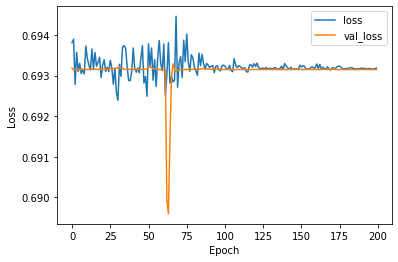

In [0]:
import matplotlib.pyplot as plt
plt.plot(result.history['loss'], label='loss')
plt.plot(result.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
pYtest = np.argmax(model.predict(Xtest), axis=1)
CM = confusion_matrix(y_pred=pYtest, y_true=Ytest.argmax(axis=1))
print(CM)

print(classification_report(y_pred=pYtest, y_true=Ytest.argmax(axis=1)))

[[82  0]
 [82  0]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67        82
           1       0.00      0.00      0.00        82

    accuracy                           0.50       164
   macro avg       0.25      0.50      0.33       164
weighted avg       0.25      0.50      0.33       164



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
# for yp in Yp:
#     print('{:0.3f} {:0.3f}'.format(yp[0], yp[1]))


# A = (Yp.argmax(axis=1) != Ytest.argmax(axis=1))
# print(A)
# for a in A:
#     if a[0] == a[1]:
#         C += 1
#end-for

C = 0
for yp, y, prediction, actual in zip(Yp, Ytest, Yp.argmax(axis=1), Ytest.argmax(axis=1)):
    print('{:0.2f} {:0.2f}'.format(yp[0], yp[1]), end='|')
    print('{} {}'.format(y[0], y[1]), end='')
    if prediction == actual:
        print(' ✔')
        C = C + 1
    else:
        print(' ✘')
#end-for

print(C/164)

0.50 0.50|1 0 ✔
0.50 0.50|1 0 ✔
0.50 0.50|1 0 ✔
0.50 0.50|1 0 ✔
0.50 0.50|1 0 ✔
0.50 0.50|1 0 ✔
0.50 0.50|1 0 ✔
0.50 0.50|1 0 ✔
0.50 0.50|1 0 ✔
0.50 0.50|1 0 ✔
0.50 0.50|1 0 ✔
0.50 0.50|1 0 ✔
0.50 0.50|1 0 ✔
0.50 0.50|1 0 ✔
0.50 0.50|1 0 ✔
0.50 0.50|1 0 ✔
0.50 0.50|1 0 ✔
0.50 0.50|1 0 ✔
0.50 0.50|1 0 ✔
0.50 0.50|1 0 ✔
0.50 0.50|1 0 ✔
0.50 0.50|1 0 ✔
0.50 0.50|1 0 ✔
0.50 0.50|1 0 ✔
0.50 0.50|1 0 ✔
0.50 0.50|1 0 ✔
0.50 0.50|1 0 ✔
0.50 0.50|1 0 ✔
0.50 0.50|1 0 ✔
0.50 0.50|1 0 ✔
0.50 0.50|1 0 ✔
0.50 0.50|1 0 ✔
0.50 0.50|1 0 ✔
0.50 0.50|1 0 ✔
0.50 0.50|1 0 ✔
0.50 0.50|1 0 ✔
0.50 0.50|1 0 ✔
0.50 0.50|1 0 ✔
0.50 0.50|1 0 ✔
0.50 0.50|1 0 ✔
0.50 0.50|1 0 ✔
0.50 0.50|1 0 ✔
0.50 0.50|1 0 ✔
0.50 0.50|1 0 ✔
0.50 0.50|1 0 ✔
0.50 0.50|1 0 ✔
0.50 0.50|1 0 ✔
0.50 0.50|1 0 ✔
0.50 0.50|1 0 ✔
0.50 0.50|1 0 ✔
0.50 0.50|1 0 ✔
0.50 0.50|1 0 ✔
0.50 0.50|1 0 ✔
0.50 0.50|1 0 ✔
0.50 0.50|1 0 ✔
0.50 0.50|1 0 ✔
0.50 0.50|1 0 ✔
0.50 0.50|1 0 ✔
0.50 0.50|1 0 ✔
0.50 0.50|1 0 ✔
0.50 0.50|1 0 ✔
0.50 0.50|1 0 ✔
0.50 0.5

In [0]:
# monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto', restore_best_weights=True)

help(EarlyStopping.__init__)

Help on function __init__ in module tensorflow.python.keras.callbacks:

__init__(self, monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
    Initialize self.  See help(type(self)) for accurate signature.



In [0]:
help(BatchNormalization.__init__)

Help on function __init__ in module tensorflow.python.keras.layers.normalization:

__init__(self, axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None, renorm=False, renorm_clipping=None, renorm_momentum=0.99, fused=None, trainable=True, virtual_batch_size=None, adjustment=None, name=None, **kwargs)



### RNN Model:

In [0]:
print(Xtrain.shape)
print(Xtest.shape)

(500, 220, 1)
(164, 220, 1)


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           [(None, 220, 1)]          0         
_________________________________________________________________
lstm-1 (LSTM)                (None, 128)               66560     
_________________________________________________________________
Dense (Dense)                (None, 2)                 258       
Total params: 66,818
Trainable params: 66,818
Non-trainable params: 0
_________________________________________________________________


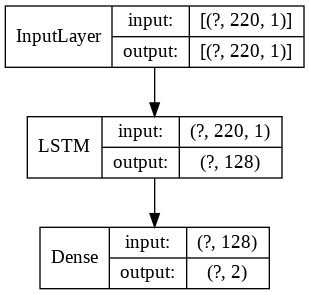

In [0]:
def Network():
    i = Input(shape=(220, 1), name='Input')
    # x = SimpleRNN(units=32, activation='tanh', name='Simple-RNN')(i)
    x = LSTM(units=128, activation='tanh', name='lstm-1')(i)
    x = Dense(units=2, activation='softmax', name='Dense')(x)

    return Model(inputs=[i], outputs=[x])
#end-def

model = Network()

model.summary()
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=False, expand_nested=True)

In [0]:
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'],
)

# Watch Tower:
# monitor = EarlyStopping(monitor='val_loss', verbose=1, patience=3)

# Train the model:
result = model.fit(Xtrain, Ytrain, validation_data=(Xtest, Ytest), epochs=600)

Train on 500 samples, validate on 164 samples
Epoch 1/600
500/500 [==============================] - 1s 3ms/sample - loss: 0.6975 - accuracy: 0.4940 - val_loss: 0.6947 - val_accuracy: 0.4939
Epoch 2/600
500/500 [==============================] - 0s 547us/sample - loss: 0.6922 - accuracy: 0.5120 - val_loss: 0.6945 - val_accuracy: 0.5366
Epoch 3/600
500/500 [==============================] - 0s 420us/sample - loss: 0.6915 - accuracy: 0.5000 - val_loss: 0.6936 - val_accuracy: 0.5427
Epoch 4/600
500/500 [==============================] - 0s 427us/sample - loss: 0.6899 - accuracy: 0.5140 - val_loss: 0.6948 - val_accuracy: 0.4817
Epoch 5/600
500/500 [==============================] - 0s 445us/sample - loss: 0.6908 - accuracy: 0.5240 - val_loss: 0.6936 - val_accuracy: 0.5305
Epoch 6/600
500/500 [==============================] - 0s 479us/sample - loss: 0.6907 - accuracy: 0.5060 - val_loss: 0.6929 - val_accuracy: 0.4878
Epoch 7/600
500/500 [==============================] - 0s 433us/sample - l